In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [77]:
df = pd.read_csv('data_tms.csv')
print(" Размерность датасета ")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")
print(" Типы данных столбцов ")
df.dtypes
print(" Информация (info) ")
df.info()
print(" Информация (describe) ")
df.describe()

 Размерность датасета 
Количество строк: 891
Количество столбцов: 12
 Типы данных столбцов 
 Информация (info) 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
 Информация (describe) 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
print(" Проверка на пропущенные значения ")
print(df.isnull().sum())
print(" Проверка на дубликаты ")
duplicates = df.duplicated().sum()
print(f"Количество дублирующихся строк: {duplicates}")
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(" Проверка на нулевые значения ")
(df == 0).sum()


 Проверка на пропущенные значения 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 Проверка на дубликаты 
Количество дублирующихся строк: 0
 Проверка на нулевые значения 


,0
PassengerId,0
Survived,549
Pclass,0
Name,0
Sex,0
Age,0
SibSp,608
Parch,678
Ticket,0
Fare,15


In [79]:
def get_title(name):
    match = re.search(r'(Mr|Mrs|Miss|Master|Dr|Rev|Col|Major|Mlle|Ms|Lady|Sir|Don|Mme|Countess|Jonkheer|Capt)', name)
    if match:
        return match.group(0)
    return "Other"

df["Title"] = df["Name"].apply(get_title)

median_ages = df.groupby("Title")["Age"].median()

def fill_age(row):
    if pd.isnull(row["Age"]):
        title = row["Title"]
        if title in median_ages and not np.isnan(median_ages[title]):
            return median_ages[title]
        else:
            return df.groupby(["Sex", "Pclass"])["Age"].transform("median")[row.name]
    return row["Age"]

missing_before = df["Age"].isna().sum()
df["Age"] = df.apply(fill_age, axis=1)
missing_after = df["Age"].isna().sum()

print(f"Пропусков в Age до: 177, после: {missing_after}")

age_bins = [0, 12, 18, 30, 50, 80]
age_labels = ["child", "teen", "young", "adult", "senior"]

df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)
df.head()



Пропусков в Age до: 177, после: 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mr,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mr,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,adult


 Анализ выживаемости 


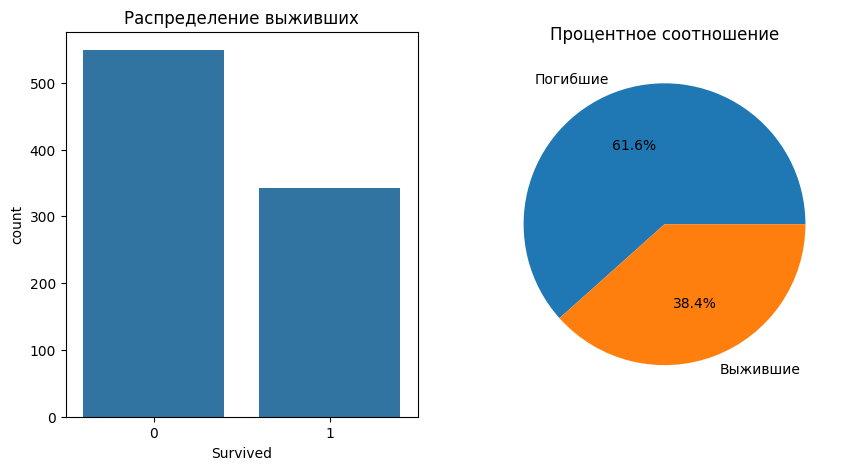

Выжили: 342 (38.4%)
Погибли: 549 (61.6%)


In [80]:
print(" Анализ выживаемости ")
survival_counts = df['Survived'].value_counts()
survival_percent = df['Survived'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Survived', data=df)
plt.title('Распределение выживших')
plt.subplot(1, 2, 2)
plt.pie(survival_counts, labels=['Погибшие', 'Выжившие'], autopct='%1.1f%%')
plt.title('Процентное соотношение')
plt.show()

print(f"Выжили: {survival_counts[1]} ({survival_percent[1]:.1f}%)")
print(f"Погибли: {survival_counts[0]} ({survival_percent[0]:.1f}%)")

 АНАЛИЗ ПО КЛАССАМ КАЮТ 


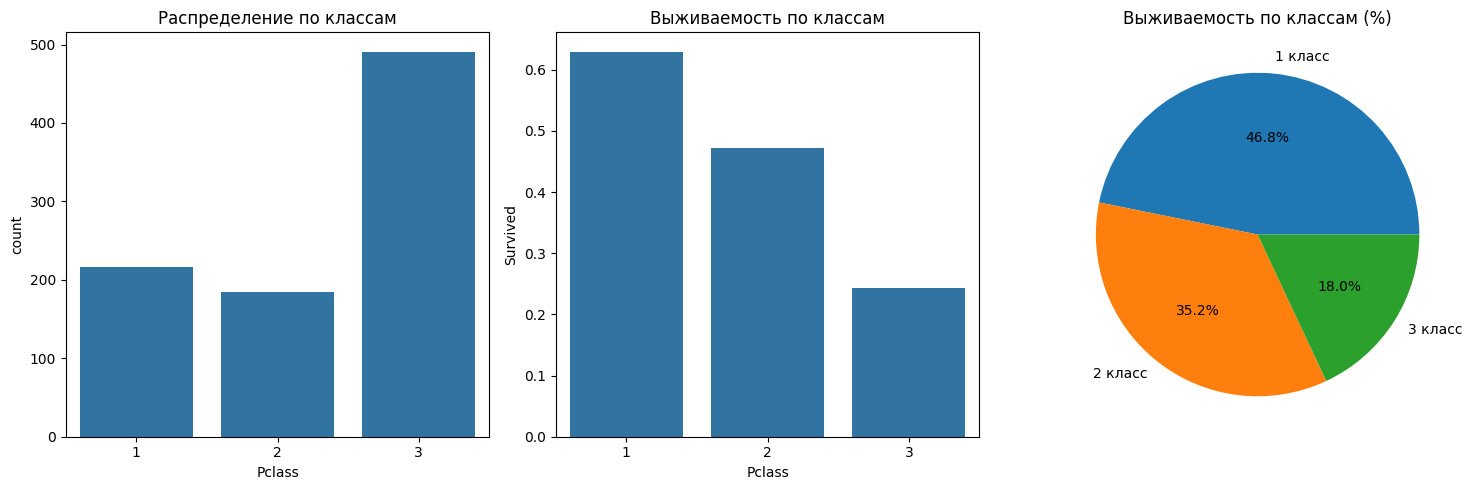

Выживаемость по классам:
Класс 1: 63.0%
Класс 2: 47.3%
Класс 3: 24.2%


In [81]:
print(" АНАЛИЗ ПО КЛАССАМ КАЮТ ")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Pclass', data=df)
plt.title('Распределение по классам')
plt.subplot(1, 3, 2)
sns.barplot(x='Pclass', y='Survived', data=df, errorbar=None)
plt.title('Выживаемость по классам')
plt.subplot(1, 3, 3)
pclass_survival = df.groupby('Pclass')['Survived'].mean() * 100
plt.pie(pclass_survival, labels=['1 класс', '2 класс', '3 класс'], autopct='%1.1f%%')
plt.title('Выживаемость по классам (%)')
plt.tight_layout()
plt.show()
print("Выживаемость по классам:")
for pclass in sorted(df['Pclass'].unique()):
    survival_rate = df[df['Pclass'] == pclass]['Survived'].mean() * 100
    print(f"Класс {pclass}: {survival_rate:.1f}%")

Анализ по полу


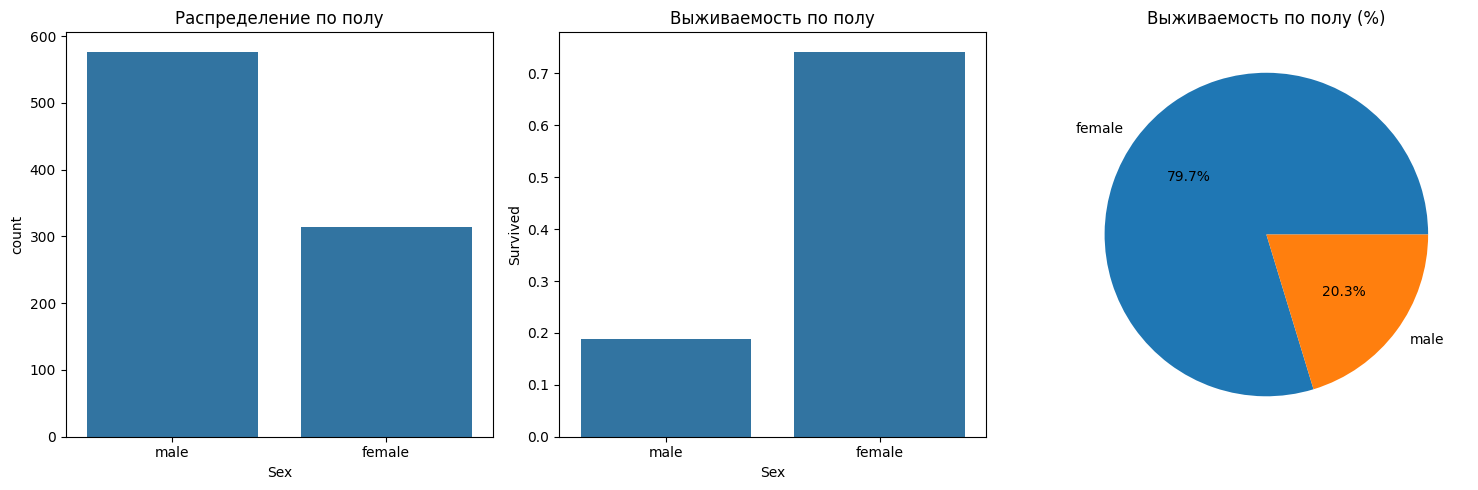

Выживаемость по полу:
male: 18.9% (n=577)
female: 74.2% (n=314)


In [82]:
print("Анализ по полу")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Sex', data=df)
plt.title('Распределение по полу')
plt.subplot(1, 3, 2)
sns.barplot(x='Sex', y='Survived', data=df, errorbar=None)
plt.title('Выживаемость по полу')
plt.subplot(1, 3, 3)
sex_survival = df.groupby('Sex')['Survived'].mean() * 100
plt.pie(sex_survival, labels=sex_survival.index, autopct='%1.1f%%')
plt.title('Выживаемость по полу (%)')
plt.tight_layout()
plt.show()
print("Выживаемость по полу:")
for sex in df['Sex'].unique():
    survival_rate = df[df['Sex'] == sex]['Survived'].mean() * 100
    count = df[df['Sex'] == sex].shape[0]
    print(f"{sex}: {survival_rate:.1f}% (n={count})")

 Анализ возраста


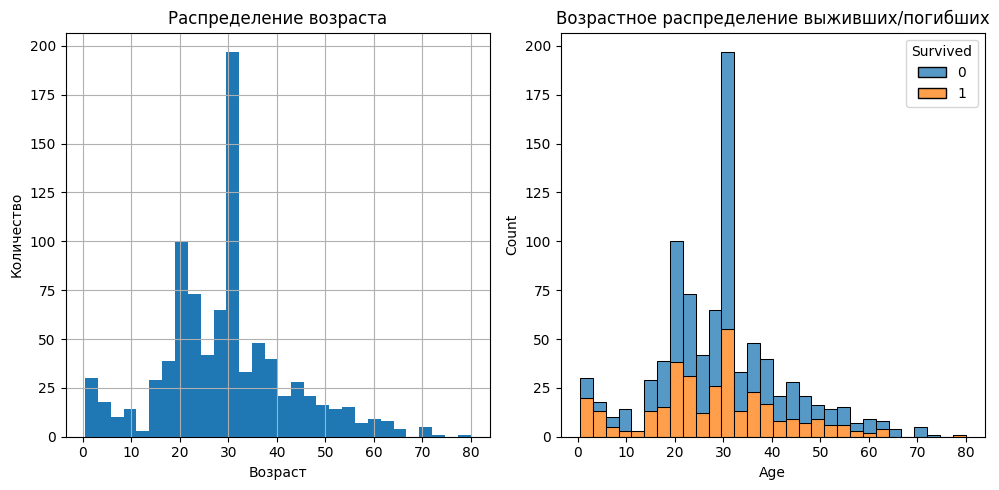

In [83]:
print(" Анализ возраста")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
df['Age'].hist(bins=30)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Возрастное распределение выживших/погибших')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1960324471.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = df.groupby('AgeGroup')['Survived'].mean() * 100


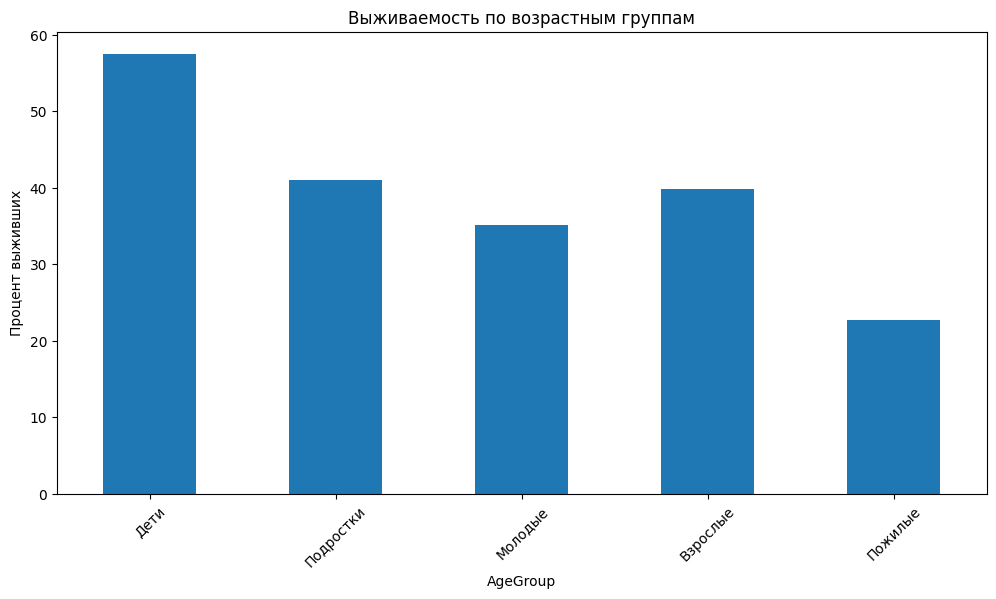

Средний возраст:
Все пассажиры: 29.4 лет
Выжившие: 28.0 лет
Погибшие: 30.3 лет


In [84]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 19, 35, 60, 100],
                        labels=['Дети', 'Подростки', 'Молодые', 'Взрослые', 'Пожилые'])

plt.figure(figsize=(12, 6))
age_group_survival = df.groupby('AgeGroup')['Survived'].mean() * 100
age_group_survival.plot(kind='bar')
plt.title('Выживаемость по возрастным группам')
plt.ylabel('Процент выживших')
plt.xticks(rotation=45)
plt.show()

print("Средний возраст:")
print(f"Все пассажиры: {df['Age'].mean():.1f} лет")
print(f"Выжившие: {df[df['Survived'] == 1]['Age'].mean():.1f} лет")
print(f"Погибшие: {df[df['Survived'] == 0]['Age'].mean():.1f} лет")

 Анализ по портам


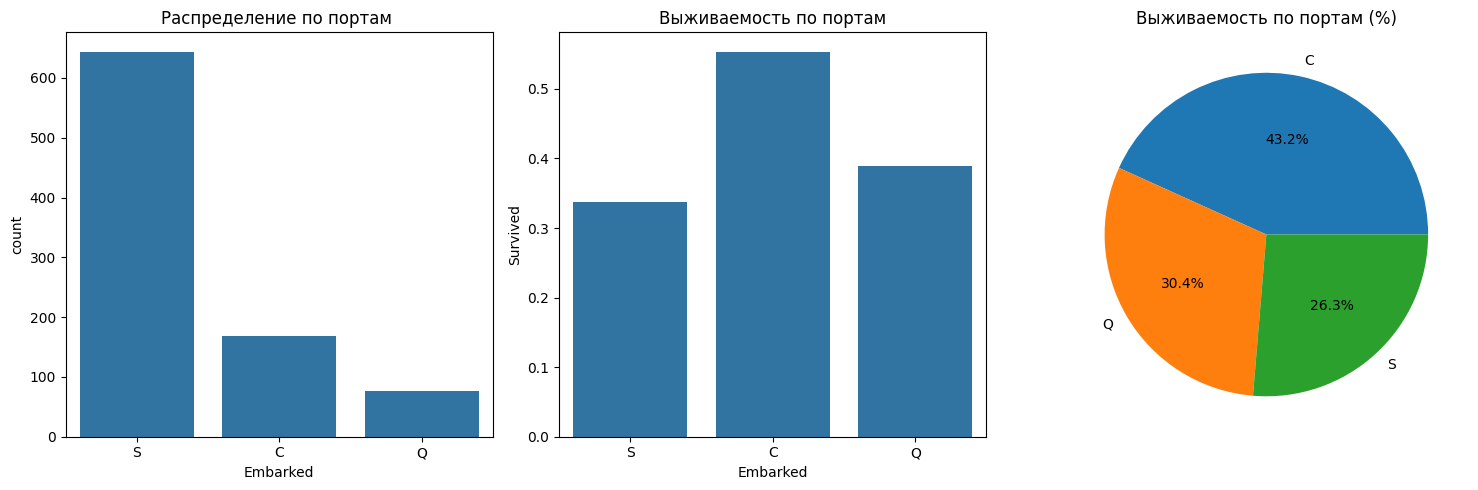

In [85]:
print(" Анализ по портам")
if 'Embarked' in df.columns:
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    sns.countplot(x='Embarked', data=df)
    plt.title('Распределение по портам ')

    plt.subplot(1, 3, 2)
    sns.barplot(x='Embarked', y='Survived', data=df, errorbar=None)
    plt.title('Выживаемость по портам')

    plt.subplot(1, 3, 3)
    embarked_survival = df.groupby('Embarked')['Survived'].mean() * 100
    plt.pie(embarked_survival, labels=embarked_survival.index, autopct='%1.1f%%')
    plt.title('Выживаемость по портам (%)')

    plt.tight_layout()
    plt.show()


Матрица корреляций


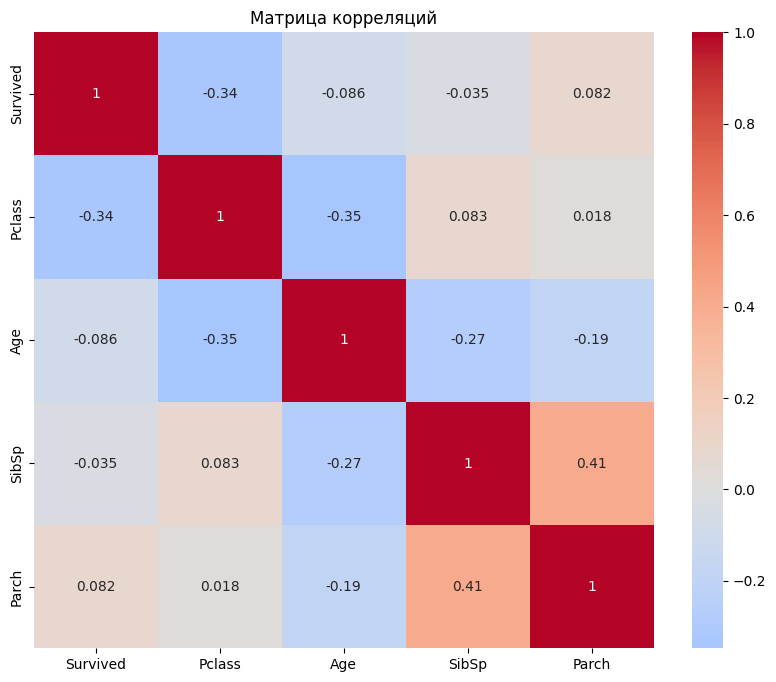

Корреляции с целевой переменной (Survived):
Parch: 0.082
SibSp: -0.035
Age: -0.086
Pclass: -0.338


In [86]:
print("Матрица корреляций")
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp','Parch']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

print("Корреляции с целевой переменной (Survived):")
correlations = correlation_matrix['Survived'].sort_values(ascending=False)
for col, corr in correlations.items():
    if col != 'Survived':
        print(f"{col}: {corr:.3f}")


In [87]:
df['Surname'] = df['Name'].str.split(',').str[0]
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

print(df[['Name', 'Surname', 'SibSp', 'Parch', 'FamilySize', 'IsAlone']].head(10))

                                                Name    Surname  SibSp  Parch  \
0                            Braund, Mr. Owen Harris     Braund      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    Cumings      1      0   
2                             Heikkinen, Miss. Laina  Heikkinen      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Futrelle      1      0   
4                           Allen, Mr. William Henry      Allen      0      0   
5                                   Moran, Mr. James      Moran      0      0   
6                            McCarthy, Mr. Timothy J   McCarthy      0      0   
7                     Palsson, Master. Gosta Leonard    Palsson      3      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    Johnson      0      2   
9                Nasser, Mrs. Nicholas (Adele Achem)     Nasser      1      0   

   FamilySize  IsAlone  
0           2        0  
1           2        0  
2           1        1  
3       

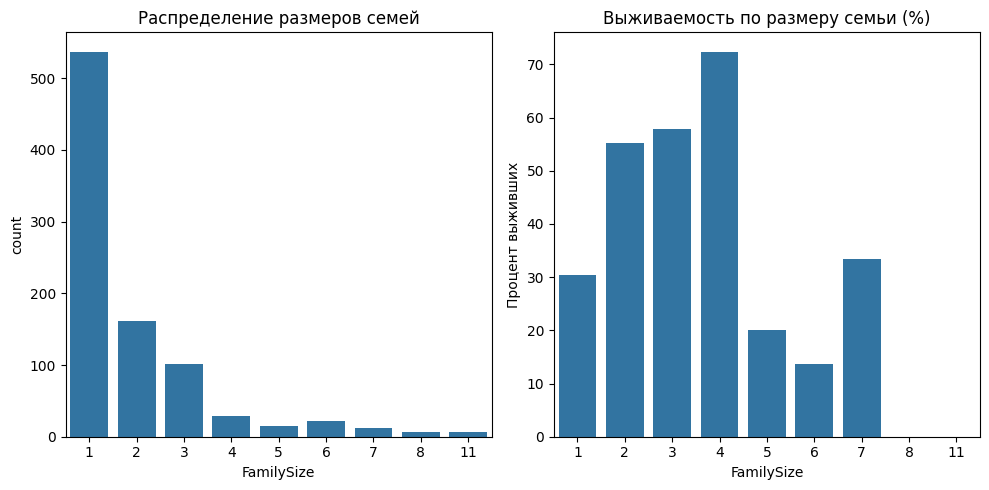

Выживаемость в зависимости от размера семьи:
Семей размером 1: 30.4% (Всего: 537 чел.)
Семей размером 2: 55.3% (Всего: 161 чел.)
Семей размером 3: 57.8% (Всего: 102 чел.)
Семей размером 4: 72.4% (Всего: 29 чел.)
Семей размером 5: 20.0% (Всего: 15 чел.)
Семей размером 6: 13.6% (Всего: 22 чел.)
Семей размером 7: 33.3% (Всего: 12 чел.)
Семей размером 8: 0.0% (Всего: 6 чел.)
Семей размером 11: 0.0% (Всего: 7 чел.)


In [88]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='FamilySize', data=df)
plt.title('Распределение размеров семей')

plt.subplot(1, 2, 2)
family_survival = df.groupby('FamilySize')['Survived'].mean() * 100
sns.barplot(x=family_survival.index, y=family_survival.values)
plt.title('Выживаемость по размеру семьи (%)')
plt.ylabel('Процент выживших')

plt.tight_layout()
plt.show()

print("Выживаемость в зависимости от размера семьи:")
for size in sorted(df['FamilySize'].unique()):
    survival_rate = df[df['FamilySize'] == size]['Survived'].mean() * 100
    count = df[df['FamilySize'] == size].shape[0]
    print(f"Семей размером {size}: {survival_rate:.1f}% (Всего: {count} чел.)")

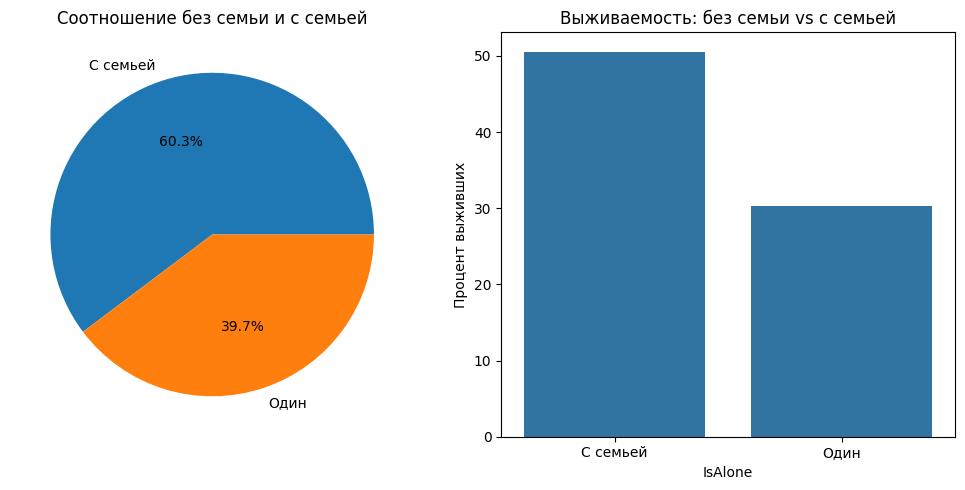

Выживаемость в зависимости от того, был ли один:
С семьей: 50.6%
Один : 30.4%


In [89]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
alone_counts = df['IsAlone'].value_counts()
plt.pie(alone_counts, labels=['С семьей', 'Один'], autopct='%1.1f%%')
plt.title('Соотношение без семьи и с семьей')
plt.subplot(1, 2, 2)
alone_survival = df.groupby('IsAlone')['Survived'].mean() * 100
sns.barplot(x=alone_survival.index, y=alone_survival.values)
plt.title('Выживаемость: без семьи vs с семьей')
plt.xticks([0, 1], ['С семьей', 'Один'])
plt.ylabel('Процент выживших')
plt.tight_layout()
plt.show()
print("Выживаемость в зависимости от того, был ли один:")
print(f"С семьей: {alone_survival[0]:.1f}%")
print(f"Один : {alone_survival[1]:.1f}%")

In [90]:
def family_category(size):
    if size == 1:
        return "Alone"
    elif 2 <= size <= 4:
        return "Small"
    else:
        return "Large"

df["FamilyCategory"] = df["FamilySize"].apply(family_category)

survival_by_familycat = df.groupby("FamilyCategory")["Survived"].mean() * 100
survival_by_familycat

,Survived
FamilyCategory,
Alone,30.353818
Large,16.129032
Small,57.876712


In [91]:
def family_category(size):
    if size == 1:
        return "Alone"
    elif 2 <= size <= 4:
        return "Small"
    else:
        return "Large"

df["FamilyCategory"] = df["FamilySize"].apply(family_category)
def prob_table(feature):
    probs = {}
    for val in df[feature].dropna().unique():
        probs[val] = {}
        for surv in [0, 1]:
            num = len(df[(df[feature] == val) & (df["Survived"] == surv)]) + 1  # сглаживание
            den = len(df[df["Survived"] == surv]) + len(df[feature].unique())
            probs[val][surv] = num / den
    return probs

p_surv = df["Survived"].mean()

prob_sex = prob_table("Sex")
prob_pclass = prob_table("Pclass")
prob_familycat = prob_table("FamilyCategory")
prob_age = prob_table("AgeGroup")

def predict_survival(passenger):
    age_group = pd.cut([passenger["Age"]], bins=age_bins, labels=age_labels, right=False)[0]

    family_cat = family_category(passenger["FamilySize"])

    probs = {}
    for surv in [0, 1]:
        prob = (p_surv if surv == 1 else (1 - p_surv))
        prob *= prob_sex.get(passenger["Sex"], {}).get(surv, 1e-6)
        prob *= prob_pclass.get(passenger["Pclass"], {}).get(surv, 1e-6)
        prob *= prob_familycat.get(family_cat, {}).get(surv, 1e-6)
        prob *= prob_age.get(age_group, {}).get(surv, 1e-6)
        probs[surv] = prob

    total = probs[0] + probs[1]
    return probs[1] / total if total > 0 else 0.5


new_passenger = {
    "Sex": "female",
    "Pclass": 1,
    "FamilySize": 3,
    "Age": 22
}
print("Вероятность выживания молодой женщины из малой семьи (1 класс):", predict_survival(new_passenger))

new_passenger = {
    "Sex": "male",
    "Pclass": 1,
    "FamilySize": 7,
    "Age": 75
}
print("Вероятность выживания пожилого мужчины из большой семьи (3 класс):", predict_survival(new_passenger))

Вероятность выживания молодой женщины из малой семьи (1 класс): 0.9441419680428104
Вероятность выживания пожилого мужчины из большой семьи (3 класс): 0.17376512327096955
